In [1]:
import pandas as pd
df = pd.read_csv('school_attack.csv')
df

,school,image,tag_info
0,가거도초등학교,saved_images/image_83196.jpg,"{'total_tag': 4, 'total_label_tag': {'낙엽': 1, ..."
1,가경초등학교,saved_images/image_40152.jpg,"{'total_tag': 0, 'total_label_tag': {}}"
2,금문초등학교,saved_images/image_83555.jpg,"{'total_tag': 5, 'total_label_tag': {'종이': 2, ..."
3,고동초등학교,saved_images/image_93295.jpg,"{'total_tag': 1, 'total_label_tag': {'종이': 1}}"
4,경희초등학교,saved_images/image_40152.jpg,"{'total_tag': 2, 'total_label_tag': {'종이': 1, ..."
5,금성초등학교,saved_images/image_93295.jpg,"{'total_tag': 6, 'total_label_tag': {'종이': 5, ..."
6,군자초등학교,saved_images/image_93295.jpg,"{'total_tag': 3, 'total_label_tag': {'종이': 3}}"


In [2]:
import ast
df['tag_info'] = df['tag_info'].apply(ast.literal_eval)
df

,school,image,tag_info
0,가거도초등학교,saved_images/image_83196.jpg,"{'total_tag': 4, 'total_label_tag': {'낙엽': 1, ..."
1,가경초등학교,saved_images/image_40152.jpg,"{'total_tag': 0, 'total_label_tag': {}}"
2,금문초등학교,saved_images/image_83555.jpg,"{'total_tag': 5, 'total_label_tag': {'종이': 2, ..."
3,고동초등학교,saved_images/image_93295.jpg,"{'total_tag': 1, 'total_label_tag': {'종이': 1}}"
4,경희초등학교,saved_images/image_40152.jpg,"{'total_tag': 2, 'total_label_tag': {'종이': 1, ..."
5,금성초등학교,saved_images/image_93295.jpg,"{'total_tag': 6, 'total_label_tag': {'종이': 5, ..."
6,군자초등학교,saved_images/image_93295.jpg,"{'total_tag': 3, 'total_label_tag': {'종이': 3}}"


In [3]:
df['total_tag'] = df['tag_info'].apply(lambda x: x.get('total_tag', 0))
df['total_tag']

0    4
1    0
2    5
3    1
4    2
5    6
6    3
Name: total_tag, dtype: int64

In [4]:
df['total_label_tag'] = df['tag_info'].apply(lambda x: x.get('total_label_tag', {}))
df['total_label_tag']

0    {'낙엽': 1, '담배꽁초': 2, '종이': 1}
1                               {}
2             {'종이': 2, '담배꽁초': 3}
3                        {'종이': 1}
4             {'종이': 1, '비닐봉지': 1}
5             {'종이': 5, '비닐봉지': 1}
6                        {'종이': 3}
Name: total_label_tag, dtype: object

In [5]:
# 모든 라벨 추출
all_labels = set()
for label_dict in df['total_label_tag']:
    all_labels.update(label_dict.keys())

# 각 라벨별 컬럼 생성
for label in all_labels:
    df[label] = df['total_label_tag'].apply(lambda x: x.get(label, 0))

df.head()

,school,image,tag_info,total_tag,total_label_tag,종이,담배꽁초,비닐봉지,낙엽
0,가거도초등학교,saved_images/image_83196.jpg,"{'total_tag': 4, 'total_label_tag': {'낙엽': 1, ...",4,"{'낙엽': 1, '담배꽁초': 2, '종이': 1}",1,2,0,1
1,가경초등학교,saved_images/image_40152.jpg,"{'total_tag': 0, 'total_label_tag': {}}",0,{},0,0,0,0
2,금문초등학교,saved_images/image_83555.jpg,"{'total_tag': 5, 'total_label_tag': {'종이': 2, ...",5,"{'종이': 2, '담배꽁초': 3}",2,3,0,0
3,고동초등학교,saved_images/image_93295.jpg,"{'total_tag': 1, 'total_label_tag': {'종이': 1}}",1,{'종이': 1},1,0,0,0
4,경희초등학교,saved_images/image_40152.jpg,"{'total_tag': 2, 'total_label_tag': {'종이': 1, ...",2,"{'종이': 1, '비닐봉지': 1}",1,0,1,0


In [6]:
df.drop(columns=['tag_info', 'total_label_tag'], inplace=True)
df

,school,image,total_tag,종이,담배꽁초,비닐봉지,낙엽
0,가거도초등학교,saved_images/image_83196.jpg,4,1,2,0,1
1,가경초등학교,saved_images/image_40152.jpg,0,0,0,0,0
2,금문초등학교,saved_images/image_83555.jpg,5,2,3,0,0
3,고동초등학교,saved_images/image_93295.jpg,1,1,0,0,0
4,경희초등학교,saved_images/image_40152.jpg,2,1,0,1,0
5,금성초등학교,saved_images/image_93295.jpg,6,5,0,1,0
6,군자초등학교,saved_images/image_93295.jpg,3,3,0,0,0


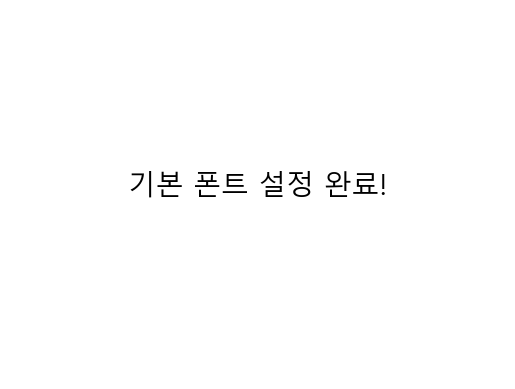

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Windows 폰트 파일 경로 (맑은 고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 폰트 프로퍼티 추출
font_prop = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib 기본 폰트로 설정
rc('font', family=font_prop)

# 예: 테스트용 한글 출력
plt.figure()
plt.text(0.5, 0.5, "기본 폰트 설정 완료!", fontsize=20, ha='center')
plt.axis('off')
plt.show()

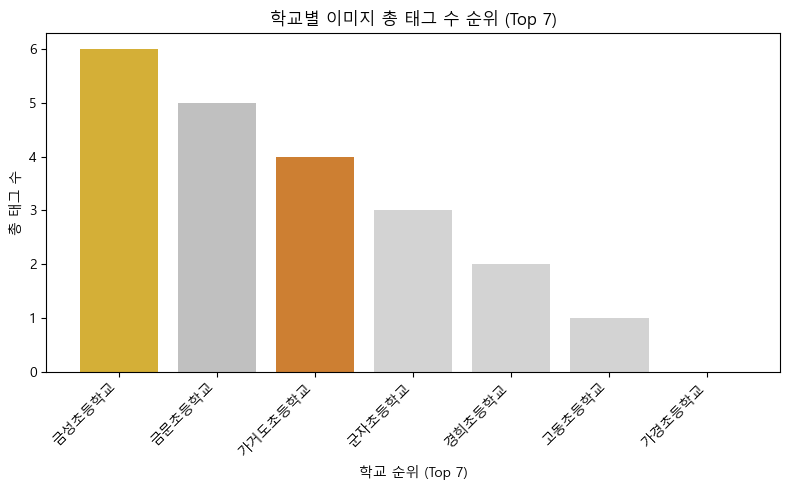

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) total_tag 내림차순 정렬 후 상위 7개만 선택
df_top7 = df.sort_values('total_tag', ascending=False).head(7).reset_index(drop=True)

# 2) 메달 색 지정 (1~3위: 금·은·동, 4~7위: 기본색)
medals = ['#d4af37', '#c0c0c0', '#cd7f32']
default_color = 'lightgray'
colors = [medals[i] if i < 3 else default_color for i in range(len(df_top7))]

# 3) 막대그래프
plt.figure(figsize=(8, 5))
plt.bar(df_top7.index + 1, df_top7['total_tag'], color=colors)
plt.xticks(df_top7.index + 1, df_top7['school'], rotation=45, ha='right')
plt.xlabel('학교 순위 (Top 7)')
plt.ylabel('총 태그 수')
plt.title('학교별 이미지 총 태그 수 순위 (Top 7)')
plt.tight_layout()
plt.show()


In [9]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 1) 사용할 폰트 파일(.ttf) 경로
font_path = r"C:/Windows/Fonts/malgun.ttf"

# 2) Matplotlib에 등록
font_manager.fontManager.addfont(font_path)

# 3) 등록된 폰트 이름 추출
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 4) 전역 폰트로 설정
rc('font', family=font_name)
